In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install kneed

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [4]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [5]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [6]:
numeric_data = df.select_dtypes(include=['float64','int64']).dropna()

In [7]:
numeric_data.isnull().sum()

ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
MSRP               0
dtype: int64

In [8]:
X = numeric_data[['QUANTITYORDERED', 'SALES']]

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [10]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\clust

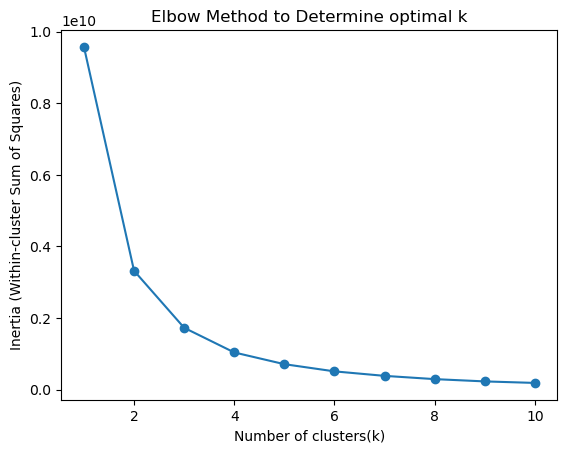

In [11]:
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method to Determine optimal k')
plt.show()

In [12]:
kneedle = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow
print("Optimal k based on elbow: ", optimal_k)

Optimal k based on elbow:  3


In [13]:
numeric_data['Cluster'] = kmeans.labels_

In [14]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
numeric_data['Cluster']=kmeans.fit_predict(X)

C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
centroids= kmeans.cluster_centers_

In [16]:
print(numeric_data[['QUANTITYORDERED', 'SALES', 'Cluster']])

      QUANTITYORDERED    SALES  Cluster
0                  30  2871.00        0
1                  34  2765.90        0
2                  41  3884.34        2
3                  45  3746.70        2
4                  49  5205.27        2
...               ...      ...      ...
2818               20  2244.40        0
2819               29  3978.51        2
2820               43  5417.57        2
2821               34  2116.16        0
2822               47  3079.44        0

[2823 rows x 3 columns]


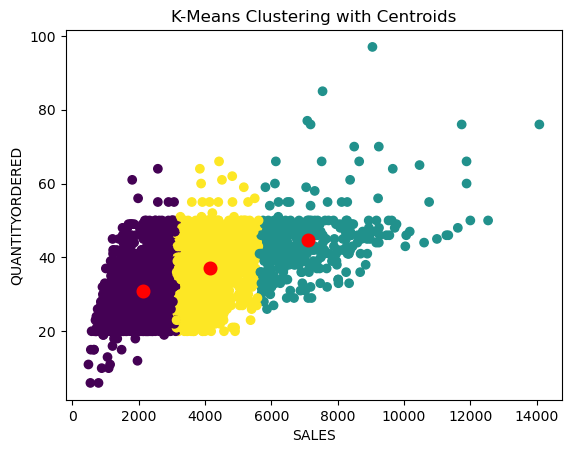

In [18]:
plt.scatter(numeric_data['SALES'], numeric_data['QUANTITYORDERED'], c=numeric_data['Cluster'])
plt.scatter(centroids[:,1],centroids[:,0], marker='.', s=200,linewidth=3, color='r')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.title('K-Means Clustering with Centroids')
plt.show()

In [19]:
import seaborn as sns

Text(0.5, 1.0, 'K-Means Clustering with Centroids')

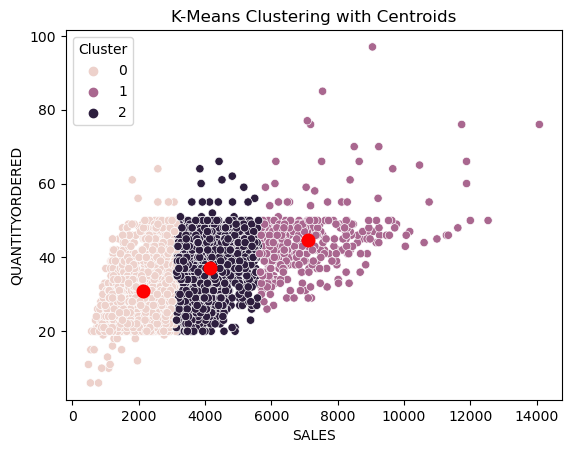

In [20]:
sns.scatterplot(x='SALES', y='QUANTITYORDERED', hue='Cluster', data=numeric_data)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='.', s=200, linewidths=3, color='r')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.title('K-Means Clustering with Centroids')